**Навигация по уроку**

1. [Нейронные сети. Математическая модель нейрона](https://colab.research.google.com/drive/1XXxO2vyd9IDYT23tQrVMAAYeHYn-Awww)
2. Нейронные сети. Функции активации.
3. [Домашняя работа](https://colab.research.google.com/drive/19VE4qs0K7XjAfkcVbwmLpGR5yKKhXyYV)

Итак, в первой части урока мы узнали, что нервный импульс через синапс попадает в тело нейрона, где суммируется, с учетом весов, с другими импульсами. После сумматора суммирующий импульс, передается в некоторую *функцию активации*, которая принимает решение, запускать импульс дальше по своему аксону или нет. Во второй части урока, мы рассмотрим функции активации, использующиеся при построении нейронных сетей.

Для понимания принципа его работы рассмотрим простой пример. Допустим, у нас есть один искусственный нейрон, роль которого — определить, идти на рыбалку или нет. Это типичная задача, в которой нужно проанализировать сочетание множества факторов и на основе этого анализа принять итоговое решение.
Для простоты учтем всего четыре фактора, влияющих на активность рыб, а значит,
на успех вернуться с рыбалки с уловом. На входы в нейрон мы подадим следующие
исходные данные и оценим влияние этих факторов на клев рыбы:

*    $x_1$ — скорость ветра;
*    $x_2$ — атмосферное давление;
*    $x_3$ — яркость солнца;
*    $x_4$ — перепад температуры воды.



В зависимости от скорости ветра во многом меняется поведение рыбы в водоеме и
ее интерес к приманкам. Небольшой по силе ветер всегда создает на поверхности
воды рябь. Из-за нее рыба не видит, что находится над водой, а потому не
пугается даже заметных и непривычных для водоема ситуаций. Когда начинается сильный ветер, рыба, предчувствуя возможную бурю или шторм, перестает клевать и уходит на глубину, где ей безопасно.

Таким образом, **при слабом ветре рыба хорошо клюет, а при сильном — клев плохой.**

Наихудшими условиями для рыбалки считаются перепады давления, а также низкое давление, хотя не все виды рыб одинаково реагируют на подобные изменения.

**Повышенное давление положительно сказывается на мелкой рыбе**, которая в поисках пищи перемещается в верхние слои воды и начинает активно клевать. При пониженном давлении она менее активна. Однако **при пониженном давлении активизируются хищники**. Мелкая рыба становится вялой, поэтому хищники тратят меньше сил и энергии в поисках пропитания. То есть при пониженном давлении не стоит рассчитывать на клев мелкой рыбы, но зато можно поймать крупного хищника.

Предположим, что мы собираемся ловить щуку или судака. Тогда при низком давлении клев этих видов рыб будет хорошим, а при высоком давлении — плохим.

**Яркое солнце не способствует хорошему улову**. Поэтому, если выходить на рыбалку в ясный солнечный день, то клёва может и не быть. Но если на небе есть облака, либо выйти на рыбалку ранним утром или вечером, то вероятность иметь хороший улов гораздо выше.

Рыбы чувствительны не столько к температуре воды, сколько к ее резким перепадам, и реагируют даже на колебания в десятые доли градуса. Перепад в 4-5°С негативно сказывается на активности рыб. Лучше всего рыба чувствует себя при минимальном суточном изменении температуры.
Считается, что этот диапазон не должен превышать 1-2°С. Так, если вчера дневная
температура воды была 10°С, а сегодня в это же время она составляет от 8 до 12°С, то это нормально, и можно прогнозировать пищевую активность рыбы. В противном случае при перепаде температуры более 4-5°С активность рыбы будет снижена. Поэтому при **резком колебании температуры воды лучше остаться дома.**



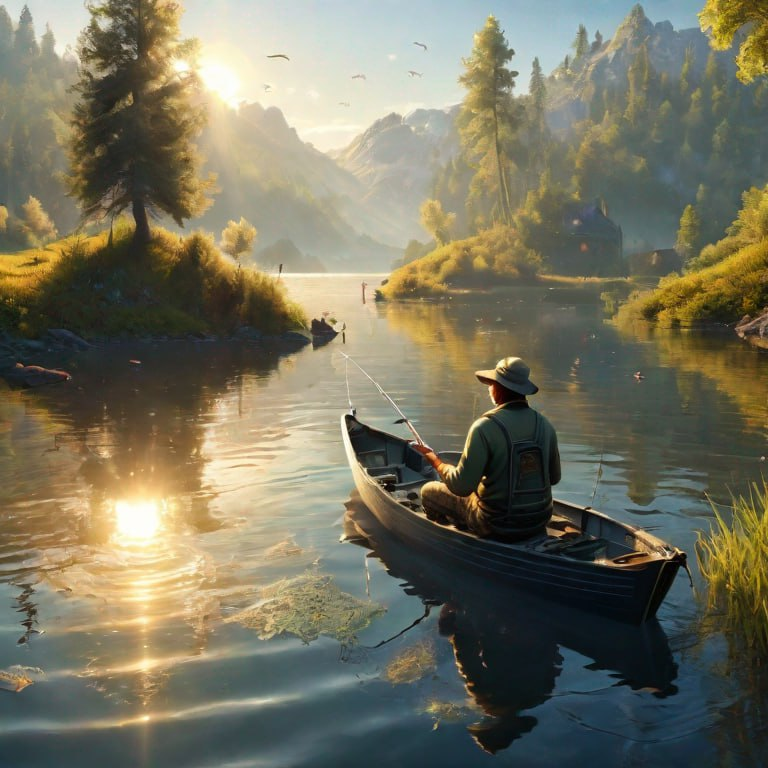

Для упрощения нашей модели присвоим всем этим параметрам логические значения в виде цифр 0 или 1. Например, если ветер умеренный и мы можем идти на рыбалку, то значение входа будет 1, если же на улице сильный ветер и клёв маловероятен, то на входе будет 0. Соответственно если атмосферное давление низкое
и щука с судаком выйдут на охоту, то на этот вход подаем 1, а если атмосферное
давление высокое, то 0. Аналогично поступаем со всеми остальными параметрами:
пасмурно — 1, солнечно — 0, температура воды стабильна — 1, сильный перепад
температуры воды — 0.

Если у нейрона есть четыре входа, то должны быть и четыре весовых коэффициента. В нашем примере весовые коэффициенты можно представить как показатели важности каждого входа, влияющие на общее решение нейрона. Чем больше значение коэффициента, тем больше важность входного параметра. Веса входов распределим следующим образом:

*   $w_1 = 5$
*   $w_2 = 4$
*   $w_3 = 1$
*   $w_4 = 1$

Мы задали весовые коэффициенты таким образом, что важную роль играют факторы скорости ветра и атмосферного давления. Они же и будут самыми важными при принятии нейроном решения. Вторые два фактора имеют более низкое влияние на принятие решения.

Пусть на входы нашего нейрона мы подаем следующие сигналы (ветер — умеренный, атмосферное давление — высокое, яркость солнца — пасмурно, температура
воды — стабильная):

*    $x_1$ = 1 (ветер умеренный);
*    $x_2$ = 0 (атмосферное давление высокое);
*    $x_3$ = 0 (солнечно);
*    $x_4$ = 1 (перепад температуры воды незначительный).

При поступлении этой информации в сумматор получим следующий результат:

$S = x_1w_1+x_2w_2+x_3w_3+x_4w_4 = 1*5+0*4+0*1+1*1 = 6$

Проверим это с помощью нашей программы-сумматора, из первой части урока:

In [ ]:
import numpy as np


class Neuron:
    def __init__ (self, w):
        self.w = w

    def у(self, x) :
        s = np.dot(self.w, x)
        return s

# Задаем входной вектор
Xi = np.array([1, 0, 0, 1])

# Задаем вектор весов
Wi = np.array([5, 4, 1, 1])
n = Neuron(Wi)
print('S = ', n.у(Xi))



S =  6


Мы получили тот же результат. Итак, сумматор выдаст нам значение $S = 6$, **а что делать дальше?**

**Как нейрон должен решить, идти на рыбалку или нет?**

Нам нужно как-то преобразовать взвешенную сумму S в итоговое решение. Эту задачу и решает **функция активации**.

Просто так выводить пользователю значение взвешенной суммы бессмысленно. Нейрон должен как-то обработать ее и сформировать адекватный выходной сигнал.

Для разных типов искусственных нейронов используют самые разные функции активации. Обозначим нашу функцию активации как $f(S)$. В этом выражении указание взвешенного сигнала S в скобках означает, что функция активации принимает его как параметр.

**Функция активации (activation function)** — это такая функция, которая в качестве входного параметра получает взвешенную сумму S как аргумент, а на выходе формирует значение выходного сигнала из нейрона Y:

$Y = f(S)$



In [ ]:
# Y = f(S)


# Y                     Сигнал нейрона
# f                     Функция активации
# S                     Взвешенную сумму входных сигналов, https://monica.im/home/chat/Monica/monica?convId=conv%3A4bc3b0d8-55a0-4acb-85dd-a593f195056c

# f — это функция активации, которая преобразует взвешенную сумму входных сигналов ( S ) в выходной сигнал нейрона ( Y ).

## Функции активации

Рассмотрим некоторые математические функции, которые могут быть использованы в качестве функции активации. Для построения функций активации мы будем использовать библиотеки numpy и matplotlib. На следующем занятии мы их детально изучим и попрактикуемся в работе с ними. Сейчас же вы можете насладиться результатами их выполнения без погружения в код.

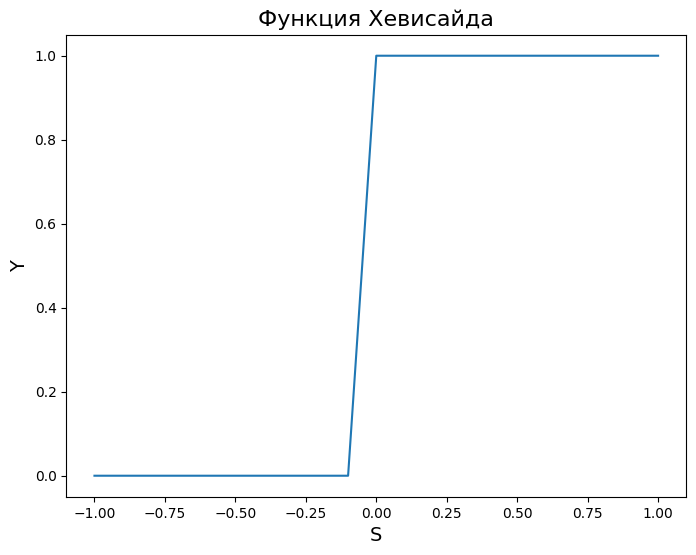

In [ ]:
#@title Единичная функция активации, бинарная функция активации, функция Хевисайда
import numpy
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title("Функция Хевисайда", fontsize=16)
ax.set_xlabel("S", fontsize=14)
ax.set_ylabel("Y", fontsize=14)

S=numpy.linspace(-1,1,num=21)
Y=numpy.heaviside( S, 1)
ax.plot(S, Y)
plt.show()

Общий вид единичной функции или как ее еще называют функцией единичного скачка (или функции Хевисайда) приведен на графике выше.
На горизонтальной оси этой функции расположены величины взвешенной суммы S.
На вертикальной оси — значения выходного сигнала Y.
Это самый простой вид функции активации.

При использовании такой функции выход из нейрона  Y может
получать только два значения: 0 или 1.

**Для** того чтобы функцию можно было применить к нашей задачи "о рыбаке и рыбке", необходимо добавить во взвешенную сумму смещение порога с обратным знаком. Допустим, что в процессе обучения наш нейрон не изменил своих весов, но обучился, что порог срабатывания при $b = 5$.

То есть наши взвешенные веса погодных условий в сумме должны набрать не меньше порога в 5, чтобы мы пошли на рыбалку. Теперь значение выходного сигнала Y
на выходе из функции активации, зависит не только от весов и входного вектора погодных условий, но и от величины смещения b.

Добавим в наш класс *Neuron* метод *onestep*, который вернет 1, для значений больше или равных 0, и 0 - при меньших значениях:


In [ ]:
# Y = f(S)

# Y                     Сигнал нейрона
# f                     Функция активации
# S                     Взвешенную сумму входных сигналов, S=x1w1+x2w2+x3w3+x4w4

# f — это функция активации, которая преобразует взвешенную сумму входных сигналов ( S ) в выходной сигнал нейрона ( Y ).

In [ ]:
import numpy as np


class Neuron:
    def __init__ (self, w):
        self.w = w

    def onestep(self, x):       # Функция активации
        if x >= 0:
            return 1
        else:
            return 0

    def у(self, x) :
        s = np.dot(self.w, x)   # Суммируем входы и добавляем смещение b
        return s


bias = 5                        # Порог срабатывания. значение выброна произвольно. тут 5 просто для примера

# Задаем входной вектор
Xi = np.array([1, 0, 0, 1])
# Задаем вектор весов
Wi = np.array([5, 4, 1, 1])

n = Neuron(Wi)
S = n.у(Xi) - bias              # Взвешенная сумма

print('S =', S)
print('Y =', n.onestep(S))

S = 1
Y = 1


In [1]:
# Тот же код с комментариями


import numpy as np  # Импортируем библиотеку NumPy для работы с массивами и математическими операциями

class Neuron:
    def __init__(self, w):
        self.w = w  # Инициализируем объект нейрона с вектором весов w

    def onestep(self, x):  # Функция активации, которая принимает входное значение x
        if x >= 0:  # Проверяем, больше ли x или равно нулю
            return 1  # Если да, возвращаем 1 (нейрон сработал)
        else:
            return 0  # Если нет, возвращаем 0 (нейрон не сработал)

    def у(self, x):  # Метод для вычисления взвешенной суммы входов
        s = np.dot(self.w, x)  # Вычисляем скалярное произведение векторов весов и входного вектора
        return s  # Возвращаем взвешенную сумму

bias = 5  # Устанавливаем порог срабатывания нейрона

# Задаем входной вектор
Xi = np.array([1, 0, 0, 1])  # Входной вектор, представляющий значения входов нейрона
# Задаем вектор весов
Wi = np.array([5, 4, 1, 1])  # Вектор весов, который будет применяться к входам

n = Neuron(Wi)  # Создаем экземпляр нейрона с заданными весами
S = n.у(Xi) - bias  # Вычисляем взвешенную сумму входов и вычитаем порог (bias)

print('S =', S)  # Выводим взвешенную сумму S
print('Y =', n.onestep(S))  # Применяем функцию активации к S и выводим результат Y

S = 1
Y = 1


В результате работы этой программы мы получим Y = 1. Таким образом мы принимаем решение, что надо ехать ловить рыбу.

Поменяем входные параметры:

$X= [0, 0, 1, 1]$

Теперь вектор входных состояний описывает следующие погодные условия: сильный ветер, высокое давление, пасмурно, без перепадов температуры воды.

In [ ]:
# ячейка выше должна быть выполненной, иначе будет ошибка

# Задаем входной вектор
Xi = np.array([0, 0, 1, 1])
S = n.у(Xi) - bias
print('S =', S)
print('Y =', n.onestep(S))

S = -3
Y = 0


Так как Y = 0, мы остаемся дома, поскольку клёва не будет.

A complete explanation -- https://monica.im/home/chat/Monica/monica?convId=conv%3A5d6ed6ad-3e78-4d73-aa06-2d13227b858e

## Сигмоида

Применяется в качестве функции активации

Существует целое семейство сигмоидальных функций, и некоторые из них применяются в качестве функции активации в искусственных нейронах. Все
эти функции обладают полезными свойствами, ради которых их и используют
в нейронных сетях. Эти свойства станут очевидными, когда мы более детально
ознакомимся с графиками таких функций. Итак, наиболее часто используемая
в нейронных сетях функция — это сигмоида, или логистическая функция.
В виде формулы ее можно представить в следующем виде:

Формульа Сигмоида:

$Y=\frac{1}{1+\exp(-aS)}$,

где a  - параметр крутизны функции.  معلمة ميل الدالة

График этой функции выглядит достаточно просто, а внешний вид имеет некоторое
подобие английской буквы S:

In [2]:
import numpy as np
x = np.linspace(-5, 5, 100)
print(x)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

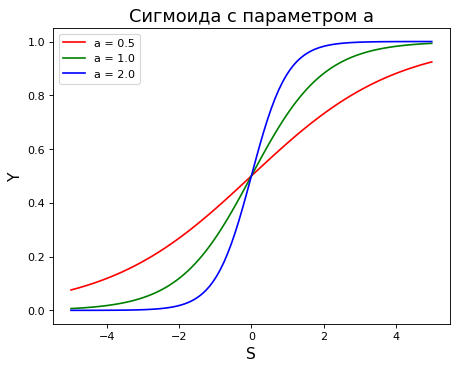

In [ ]:
#@title Сигмоида с параметром a
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)  # Функция linspace создает МАССИВ из 100 равномерно распределенных чисел в диапазоне от -5 до 5

def sigmoid(alpha):
    return 1 / ( 1 + np.exp(-alpha * x) )

dpi = 80
fig, ax = plt.subplots(dpi = dpi, figsize=(512 / dpi, 384 / dpi))
ax.set_title("Сигмоида с параметром a", fontsize=16)
ax.set_xlabel("S", fontsize=14)
ax.set_ylabel("Y", fontsize=14)

plt.plot(x, sigmoid(0.5), 'r-')
plt.plot(x, sigmoid(1.0), 'g-')
plt.plot(x, sigmoid(2.0), 'b-')

plt.legend(['a = 0.5', 'a = 1.0', 'a = 2.0'], loc = 'upper left')
plt.show()

Вернемся к примеру с рыбалкой. С функцией Хевисайда все было очевидно: мы либо едем на рыбалку — при Y = 1, либо нет — при Y = 0.
Используя же сигмоиду, мы получаем вероятность между 0 и 1. Причем чем больше взвешенная сумма S, тем ближе Y будет к 1. И наоборот, чем меньше взвешенная сумма, тем Y будет ближе к 0.

Например, в нашем примере с походом на рыбалку при значении Y = 0.8, скорее всего, стоит идти на рыбалку. При Y = 0.2, наверное, стоит отказаться от такого похода.

Учитывая вероятностный результат итогового значения Y, его стоит интерпретировать также вероятно. Например, Y = 0.8 показывает, что мы с вероятностью 80% поймаем столько рыбы сколько ожидаем. А при Y = 0.5 стоит ожидать половину улова. Такой вероятностный подход, позволяет нам ввести субъективное пороговое значение. Каждый сам для себя может определиться какой ожидаемый улов заставит пойти на рыбалку.
Например, если задать пороговое значение Y = 0.7, то при рассчитанной величине
Y >= 0.7 всегда идем на рыбалку, а при Y < 0.7 остаемся дома.


In [ ]:
import numpy as np


class Neuron:
    def __init__ (self, w):
        self.w = w

    def onestep(self, x): # Функция активации
        b = 5
        if x >= b:
            return 1
        else:
            return 0

    # функция активации (сигмоида)
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def у(self, x) :
        s = np.dot(self.w, x) # Суммируем входы
        return s


# Задаем входной вектор
Xi = np.array([0, 0, 1, 1])

# Задаем вектор весов
Wi = np.array([5, 4, 1, 1])
n = Neuron(Wi)

bias = 5
S = n.у(Xi) - bias
print('S =', S)
print('Y =', n.sigmoid(S))

S = -3
Y = 0.04742587317756678


Как видно из примера выше, при вероятности улова в менее чем 5% от ожидаемого, мы точно останемся дома. А если выбрать самые плохие погодные условия возможные в задаче $x_1=x_2=x_3=x_4 = 0$, получим  S = -5 и Y = 0.0066:

In [ ]:
# ячейка выше должна быть выполненной, иначе будет ошибка

# Задаем входной вектор
Xi = np.array([0, 0, 0, 0])
bias = 5
S = n.у(Xi) - bias
print('S =', S)
print('Y =', n.sigmoid(S))

S = -5
Y = 0.0066928509242848554


Вряд ли кого-то перспектива улова в менее 1% заставит выйти из дома. Если мы потенциально можем наловить при хороших условиях на наше снаряжение 100 рыбок, то перспектива поймать одну или ничего, кажется совсем удручающей.

**Почему логистическая функция (сигмоида) так популярна в ИИ?**

Главная сила логистической функции - ее свойства:

* она является «сжимающей» функцией, вне зависимости от аргумента *S*, выходной сигнал Y всегда будет в пределах от 0 до 1;
* имеет значения не только 0 и 1, как единичная функция, но и любое число между ними;
* во всех точках она имеет производную, и эта производная может быть выражена
через эту же функцию (Это очень важное свойство и мы к нему нм раз еще вернемся).

Именно из-за этих свойств логистическая функция чаще всего используется в качестве функции активации в искусственных нейронах.

Когда мы перейдем от одного нейрона к целым слоям, то вы познакомитесь с функцией Softmax. Основа функции тоже Sigmoid, выходные данные, аналогично Sigmoid, находятся в диапазоне [0; 1]. Но отличается принципом работы. Функция Softmax работает на принципе относительной вероятности и является комбинацией нескольких Sigmoid-функций. Сумма выходных данных этих комбинаций должна равняться 1, так как функция возвращает вероятность принадлежности к классу. Чаще всего используется именно для последнего слоя нейронной сети, которая работает с задачами классификации из множества классов.


## Гиперболический тангенс

*Гиперболический тангенс* - еще один вид сигмоид, его выделяют отдельно, так как он позволяет получить на выходе значения разных знаков (от -1 до 1),
что может быть полезным для ряда сетей. Эту функцию чаще
применяют биологи для более реалистичной реализации модели нервной клетки.

Аналитически функцию можно записать следующим образом:
$Y = th(S)$.

Построим график функции для гиперболического тангенса.

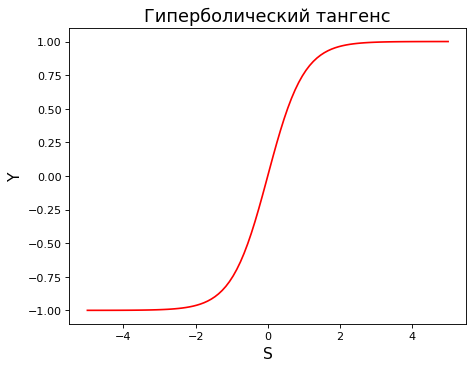

In [ ]:
#@title Гиперболический тангенс
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)

dpi = 80
fig, ax = plt.subplots(dpi = dpi, figsize=(512 / dpi, 384 / dpi))
ax.set_title("Гиперболический тангенс", fontsize=16)
ax.set_xlabel("S", fontsize=14)
ax.set_ylabel("Y", fontsize=14)

plt.plot(x, np.tanh(x), 'r-') # Функция гиперболического тангенса содержится в библиотеке NumPy.

plt.show()

Применим к нашей задаче функцию активации гиперболический тангенс и получим рекомендацию, надо ли идти на рыбалку:

In [ ]:
# ячейка выше должна быть выполненной, иначе будет ошибка

# Задаем входной вектор

Xi = np.array([0, 0, 1, 1])
bias = 5
S = n.у(Xi) - bias
print('S =', S)
print('Y =', np.tanh(S))

S = -3
Y = -0.9950547536867305


Гиперболический тангенс, тоже вполне подходит к нашей задаче, только принимать решение мы будем руководствуясь знаком Y: Y>=0 - идем на рыбалку, Y<0 - остаемся дома.

## ReLU & Leaky ReLU & ELU

Эти функции активации очень похожи на линейную (на графике ниже, зеленым цветом), однако они линейны только в положительной части.

Функция ReLU, несмотря на свою простоту, наиболее часто используемая функция активации при глубоком обучении. Данная функция возвращает 0, если принимает отрицательный аргумент, и возвращает само число для положительного аргумента.

Функция ReLU обладает несколькими преимущества перед сигмоидой и гиперболическим тангенсом:
* Очень быстро и просто считается производная. Для отрицательных значений — 0, для положительных — 1.
* Разреженность активации. В сетях с очень большим количеством нейронов использование сигмоидной функции или гиперболического тангенса в качестве активационный функции влечет активацию почти всех нейронов, что может сказаться на производительности обучения модели. Если же использовать ReLU, то количество включаемых нейронов станет меньше, в силу характеристик функции, и сама сеть станет легче.

Но есть и большая проблема умирающего ReLU. Так как производная функции равна нулю, а при обучении мы будем пользоваться производными, то многие веса перестают обучаться.

Обучение необходимо начинать с простой, быстрообучаемой функции активации. Вот здесь у функции ReLU нет равных. Но если после обучения модели результаты получились не оптимальные, то тогда стоит перейти к другим функциям, которые могут дать лучший результат, но обучаться будут значительно дольше.

In [ ]:
# Реализация функции ReLU
def ReLU(x):
    if x > 0:
        return x
    else:
        return 0

**LeakyReLU** - принцип работы похож на ReLU, с единственным отличием — нейроны с отрицательными данными на входе участвуют в обучении НС. Веса для них пересчитываются. На практике, результат не всегда сильно улучшается относительно ReLU, но скорость вычисления сильно замедляется.








In [ ]:
# Реализация функции LeakyReLU
def LeakyReLU(x, alfa=0.1):
    if x > 0:
        return x
    else:
        return x*alfa

**Функция экспоненциальных единиц (ELU)** - это наиболее удачная реализация функции ReLU за счет изменения отрицательной части. Функция использует логарифмическую кривую для отрицательных значений. Главный недостаток - экспоненты сложно считаются, увеличивается время вычислений.


In [ ]:
# Реализация функции ELU
def ELU(x, alfa=0.1):

    if x > 0:
        return x
    else:
        return alfa * (np.exp(x)-1)

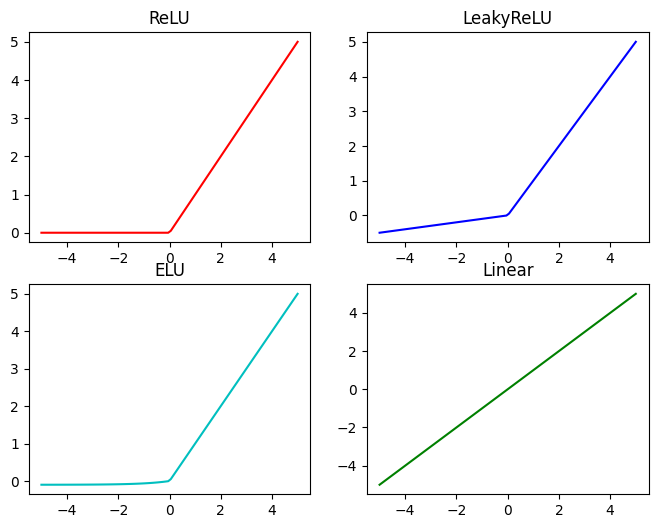

In [ ]:
#@title ReLu и его друзья
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)

from matplotlib import pyplot

def ReLU(x):
    if x > 0:
        return x
    else:
        return 0
def LeakyReLU(x, alfa=0.1):
    if x > 0:
        return x
    else:
        return x*alfa

def ELU(x, alfa=0.1):

    if x > 0:
        return x
    else:
        return alfa * (np.exp(x)-1)


fig, axis = plt.subplots(2, 2, figsize=(8, 6))
# ax.set_xlabel("S", fontsize=14)
# ax.set_ylabel("Y", fontsize=14)

axis[0, 0].plot(x, [ReLU(y) for y in x], 'r-')
axis[0, 0].set_title("ReLU")

axis[0, 1].plot(x, [LeakyReLU(y) for y in x], 'b-')
axis[0, 1].set_title("LeakyReLU")

axis[1, 0].plot(x, [ELU(y) for y in x], 'c-')
axis[1, 0].set_title("ELU")

axis[1, 1].plot(x, x, 'g-')
axis[1, 1].set_title("Linear")



plt.show()

На этом теоретическая часть урока завершена. Пора переходить к [домашней работе](https://colab.research.google.com/drive/19VE4qs0K7XjAfkcVbwmLpGR5yKKhXyYV).